In [54]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [55]:
BASE_DIR = '../../data/rawdata/'

In [56]:
def check_correct(row):
    if row['big_small'] == 'S' and row['opt'] == 4:
        return True
    elif row['big_small'] == 'B' and row['opt'] == 3:
        return True
    return False

def read_bh(file):
    '''Auxiliary function to read the data from the behavioural file
    in the specified format and with meaningful column names.'''
    df = pd.read_csv(file, header=None,
        names=['o', 'ab', 'show_times', 'stim', 'PER', 'big_small', 'nl', 'onset', 'opt', 'response_time']).drop(
        columns=['o', 'PER']
    )
    df['opt'] = df['opt'].astype('Int64')

    df['correct'] = df[df['opt'].notna()].apply(check_correct, axis=1)
    return df

def add_consecutive(df):
    df['sequence'] = df.sort_values(by='onset').groupby('stim').cumcount() + 1
    return df

def get_trials_condition(df):
    '''Auxiliary function to get the number of trials and unique stimuli
    in the dataset, as well as the number of trials for each condition.'''
    dummy = df[(df['opt'].isna()) | (df['correct'] == False)]
    p11 = df[(df['show_times'] == 1) & (df['correct'] == True)]
    p31 = df[(df['show_times'] == 3) & (df['correct'] == True) & (df['sequence'] == 1)]
    p32 = df[(df['show_times'] == 3) & (df['correct'] == True) & (df['sequence'] == 2)]
    p33 = df[(df['show_times'] == 3) & (df['correct'] == True) & (df['sequence'] == 3)]

    print('Number of trials:', len(df))
    print('Number of unique stimuli:', len(df['stim'].unique()))
    print('------')
    print(f'                Number of 1-show trials: {len(p11)}')
    print(f'Number of 3-show trials with sequence 1: {len(p31)}')
    print(f'Number of 3-show trials with sequence 2: {len(p32)}')
    print(f'Number of 3-show trials with sequence 3: {len(p33)}')
    print(f'                 Number of dummy trials: {len(dummy)}')

    return {
        'p11': p11,
        'p31': p31,
        'p32': p32,
        'p33': p33,
        'dummy': dummy,
        'total': len(df),
        'unique': len(df['stim'].unique()),
        'correct': len(df[df['correct'] == True]),
        'incorrect': len(df[df['correct'] == False | df['correct'].isna()]),
    }

In [57]:
def get_ps_from_file(file):
    '''Auxiliary function to read the data from the behavioural file
    and add the sequence column to it.'''
    print('*'*50)
    print(f'Processing file {file}')
    df = read_bh(file)
    df = add_consecutive(df)
    return get_trials_condition(df)

In [58]:
# Get all subjects' directories
base_path = Path(BASE_DIR)
subjects = sorted([d for d in base_path.iterdir() if d.is_dir()])
data = {}

# Load all behaviour files
for subject in subjects:
    # Behaviour files are CSVs in the beh directory
    beh_files = sorted(subject.glob('beh/*.csv'))
    csvs = {}
    # Each subject should have 2 behaviour files
    if len(beh_files) != 2:
        print(f'Error: {subject.name} does not have 2 behaviour files')
        continue
    # Load the CSVs with pandas.read_csv
    csvs['rep1'] = get_ps_from_file(beh_files[0])
    csvs['rep2'] = get_ps_from_file(beh_files[1])
    data[subject.name] = csvs

**************************************************
Processing file ../../data/rawdata/o01/beh/o01-1.csv
Number of trials: 48
Number of unique stimuli: 24
------
                Number of 1-show trials: 10
Number of 3-show trials with sequence 1: 7
Number of 3-show trials with sequence 2: 7
Number of 3-show trials with sequence 3: 10
                 Number of dummy trials: 14
**************************************************
Processing file ../../data/rawdata/o01/beh/o01-2.csv
Number of trials: 48
Number of unique stimuli: 24
------
                Number of 1-show trials: 10
Number of 3-show trials with sequence 1: 10
Number of 3-show trials with sequence 2: 9
Number of 3-show trials with sequence 3: 9
                 Number of dummy trials: 10
**************************************************
Processing file ../../data/rawdata/o02/beh/o02-1.csv
Number of trials: 48
Number of unique stimuli: 24
------
                Number of 1-show trials: 11
Number of 3-show trials with sequence

In [59]:
print(data.keys())

dict_keys(['o01', 'o02', 'o03', 'o04', 'o05', 'o06', 'o07', 'o08', 'o09', 'o10', 'o11', 'o12', 'o13', 'o14', 'o15', 'o16', 'o17', 'o18', 'y01', 'y02', 'y03', 'y04', 'y05', 'y06', 'y07', 'y08', 'y09', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19'])


In [60]:
data['y01']['rep1']

{'p11':    ab  show_times                   stim big_small  nl   onset  opt  \
 2   D           1    stim/flashlight.bmp         S  NL   35988    4   
 11  D           1  stim/sequoia_tree.bmp         B   L   82988    3   
 15  D           1        stim/basket.bmp         B  NL   98988    3   
 21  D           1       stim/blender.bmp         B  NL  116988    3   
 28  D           1          stim/bear.bmp         B   L  141988    3   
 31  D           1     stim/saxophone.bmp         B  NL  166988    3   
 33  D           1          stim/dove.bmp         S   L  188988    4   
 34  D           1          stim/yarn.bmp         S  NL  199988    4   
 36  D           1       stim/grappes.bmp         S   L  221988    4   
 37  D           1     stim/raspberry.bmp         S   L  224988    4   
 39  D           1           stim/dog.bmp         B   L  230989    3   
 47  D           1        stim/camera.bmp         S  NL  262988    4   
 
     response_time  correct  sequence  
 2             

In [61]:
data['y01']['rep1']['dummy']

,ab,show_times,stim,big_small,nl,onset,opt,response_time,correct,sequence
5,A,3,stim/penguin.bmp,B,L,44988,4,811,False,1
12,A,3,stim/envelope.bmp,S,NL,89988,3,860,False,1
27,A,3,stim/toilett.bmp,B,NL,134988,4,590,False,2


## Analysis intra-rep

In [62]:
rep_stats_df = pd.DataFrame(columns=[
    'subject',
    'rep',
    'total',
    'unique',
    'correct',
    'incorrect',
    'accuracy',
    'p31',
    'p32',
    'p33',
    'p31_mean_rt',
    'p32_mean_rt',
    'p33_mean_rt',
    'p31_std_rt',
    'p32_std_rt',
    'p33_std_rt',
    'dummy_p3_',
    'mean_rt',
    'std_rt',
    'mean_acc',
    'std_acc'
    ])

In [63]:
for subject in data.keys():
    new_rows = []
    new_rows.append({
        'subject': subject,
        'rep': 'rep1',
        'total': data[subject]['rep1']['total'],
        'unique': data[subject]['rep1']['unique'],
        'correct': data[subject]['rep1']['correct'],
        'incorrect': data[subject]['rep1']['incorrect'],
        'accuracy': data[subject]['rep1']['correct'] / data[subject]['rep1']['total'],
        'p31': len(data[subject]['rep1']['p31']),
        'p32': len(data[subject]['rep1']['p32']),
        'p33': len(data[subject]['rep1']['p33']),
        'p31_mean_rt': data[subject]['rep1']['p31']['response_time'].mean(),
        'p32_mean_rt': data[subject]['rep1']['p32']['response_time'].mean(),
        'p33_mean_rt': data[subject]['rep1']['p33']['response_time'].mean(),
        'p31_std_rt': data[subject]['rep1']['p31']['response_time'].std(),
        'p32_std_rt': data[subject]['rep1']['p32']['response_time'].std(),
        'p33_std_rt': data[subject]['rep1']['p33']['response_time'].std(),
        'dummy_p3_': len(data[subject]['rep1']['dummy'][data[subject]['rep1']['dummy']['show_times'] == 3]),
        'mean_acc': 0,
        'std_acc': 0
    })
    new_rows.append({
        'subject': subject,
        'rep': 'rep2',
        'total': data[subject]['rep2']['total'],
        'unique': data[subject]['rep2']['unique'],
        'correct': data[subject]['rep2']['correct'],
        'incorrect': data[subject]['rep2']['incorrect'],
        'accuracy': data[subject]['rep2']['correct'] / data[subject]['rep2']['total'],
        'p31': len(data[subject]['rep2']['p31']),
        'p32': len(data[subject]['rep2']['p32']),
        'p33': len(data[subject]['rep2']['p33']),
        'p31_mean_rt': data[subject]['rep2']['p31']['response_time'].mean(),
        'p32_mean_rt': data[subject]['rep2']['p32']['response_time'].mean(),
        'p33_mean_rt': data[subject]['rep2']['p33']['response_time'].mean(),
        'p31_std_rt': data[subject]['rep2']['p31']['response_time'].std(),
        'p32_std_rt': data[subject]['rep2']['p32']['response_time'].std(),
        'p33_std_rt': data[subject]['rep2']['p33']['response_time'].std(),
        'dummy_p3_': len(data[subject]['rep2']['dummy'][data[subject]['rep2']['dummy']['show_times'] == 3]),
        'mean_rt': data[subject]['rep2']['p31']['response_time'].mean(),
        'std_rt': data[subject]['rep2']['p31']['response_time'].std(),
        'mean_acc': 0,
        'std_acc': 0
    })

    rep_stats_df = pd.concat([rep_stats_df, pd.DataFrame(new_rows)])

/tmp/ipykernel_3500/3525745861.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rep_stats_df = pd.concat([rep_stats_df, pd.DataFrame(new_rows)])


In [64]:
rep_stats_df

,subject,rep,total,unique,correct,incorrect,accuracy,p31,p32,p33,...,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc
0,o01,rep1,48,24,34,1,0.708333,7,7,10,...,803.285714,860.800000,140.580768,153.969385,158.489257,12,NaN,NaN,0,0
1,o01,rep2,48,24,38,5,0.791667,10,9,9,...,838.666667,789.444444,207.437943,164.601033,159.204359,8,965.500000,207.437943,0,0
0,o02,rep1,48,24,47,1,0.979167,12,12,12,...,644.750000,666.666667,137.895876,112.039867,98.721218,0,NaN,NaN,0,0
1,o02,rep2,48,24,47,1,0.979167,12,12,12,...,648.500000,711.333333,150.318752,87.060585,96.502787,0,807.500000,150.318752,0,0
0,o03,rep1,48,24,48,0,1.000000,12,12,12,...,667.000000,722.000000,182.404375,111.949664,107.331263,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,y17,rep2,48,24,45,3,0.937500,10,12,12,...,665.833333,635.916667,133.544999,103.270900,74.456160,2,721.400000,133.544999,0,0
0,y18,rep1,48,24,42,6,0.875000,11,10,11,...,660.600000,738.727273,198.030989,85.381757,168.161286,4,NaN,NaN,0,0
1,y18,rep2,48,24,46,2,0.958333,12,12,11,...,637.166667,667.272727,114.015018,102.322870,132.324670,1,765.833333,114.015018,0,0
0,y19,rep1,48,24,43,5,0.895833,11,11,11,...,664.272727,663.000000,196.760953,90.145539,72.908161,3,NaN,NaN,0,0


In [65]:
reps1 = rep_stats_df[rep_stats_df['rep'] == 'rep1']
reps2 = rep_stats_df[rep_stats_df['rep'] == 'rep2']
reps1

,subject,rep,total,unique,correct,incorrect,accuracy,p31,p32,p33,...,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc
0,o01,rep1,48,24,34,1,0.708333,7,7,10,...,803.285714,860.800000,140.580768,153.969385,158.489257,12,NaN,NaN,0,0
0,o02,rep1,48,24,47,1,0.979167,12,12,12,...,644.750000,666.666667,137.895876,112.039867,98.721218,0,NaN,NaN,0,0
0,o03,rep1,48,24,48,0,1.000000,12,12,12,...,667.000000,722.000000,182.404375,111.949664,107.331263,0,NaN,NaN,0,0
0,o04,rep1,48,24,45,3,0.937500,12,11,12,...,1169.090909,1120.916667,176.036906,442.212721,446.473955,1,NaN,NaN,0,0
0,o05,rep1,48,24,33,1,0.687500,7,9,10,...,755.888889,841.200000,267.795231,171.889823,142.081197,10,NaN,NaN,0,0
0,o06,rep1,48,24,40,3,0.833333,11,10,11,...,836.900000,832.727273,100.903915,202.412368,179.417441,4,NaN,NaN,0,0
0,o07,rep1,48,24,46,2,0.958333,11,12,12,...,737.916667,788.666667,179.852313,102.281660,115.464543,1,NaN,NaN,0,0
0,o08,rep1,48,24,47,1,0.979167,12,12,11,...,1018.416667,867.727273,458.506634,408.424792,375.006691,1,NaN,NaN,0,0
0,o09,rep1,48,24,38,2,0.791667,6,10,11,...,915.700000,706.090909,315.977003,551.317221,141.673889,9,NaN,NaN,0,0
0,o10,rep1,48,24,47,1,0.979167,12,12,12,...,855.500000,826.833333,275.913963,493.341206,331.366546,0,NaN,NaN,0,0


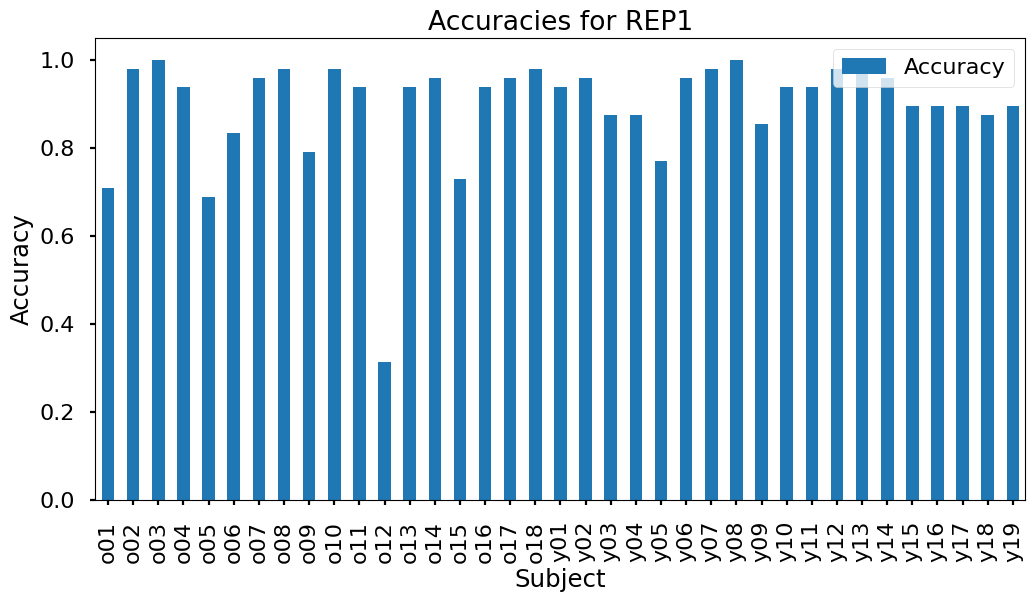

In [66]:
reps1[['subject', 'accuracy']].set_index('subject').plot(kind='bar', figsize=(12, 6))
plt.xlabel('Subject')
plt.ylabel('Accuracy')
plt.title('Accuracies for REP1')
plt.legend(['Accuracy'])
plt.show()

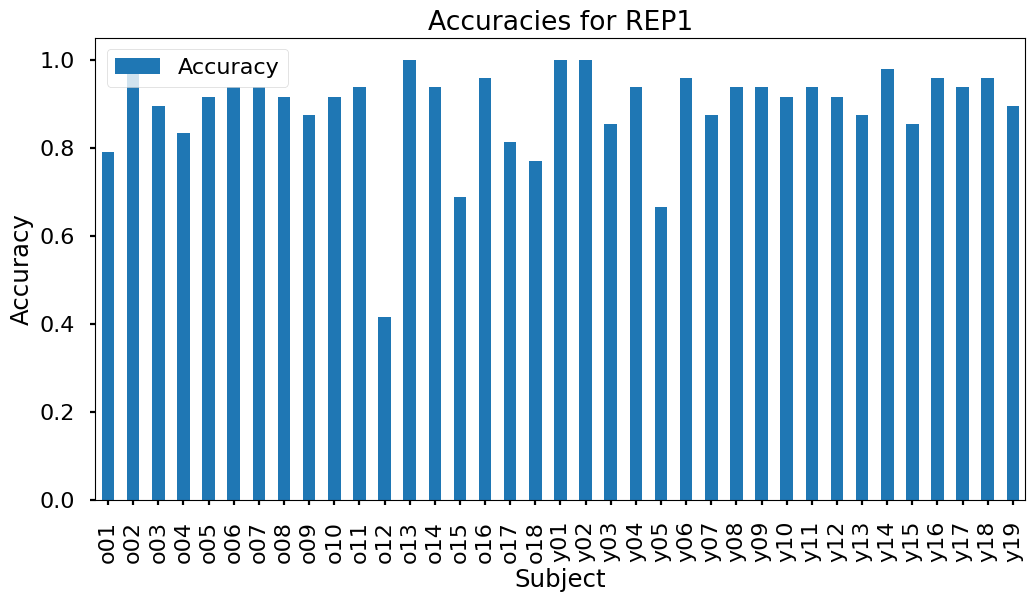

In [67]:
reps2[['subject', 'accuracy']].set_index('subject').plot(kind='bar', figsize=(12, 6))
plt.xlabel('Subject')
plt.ylabel('Accuracy')
plt.title('Accuracies for REP1')
plt.legend(['Accuracy'])
plt.show()

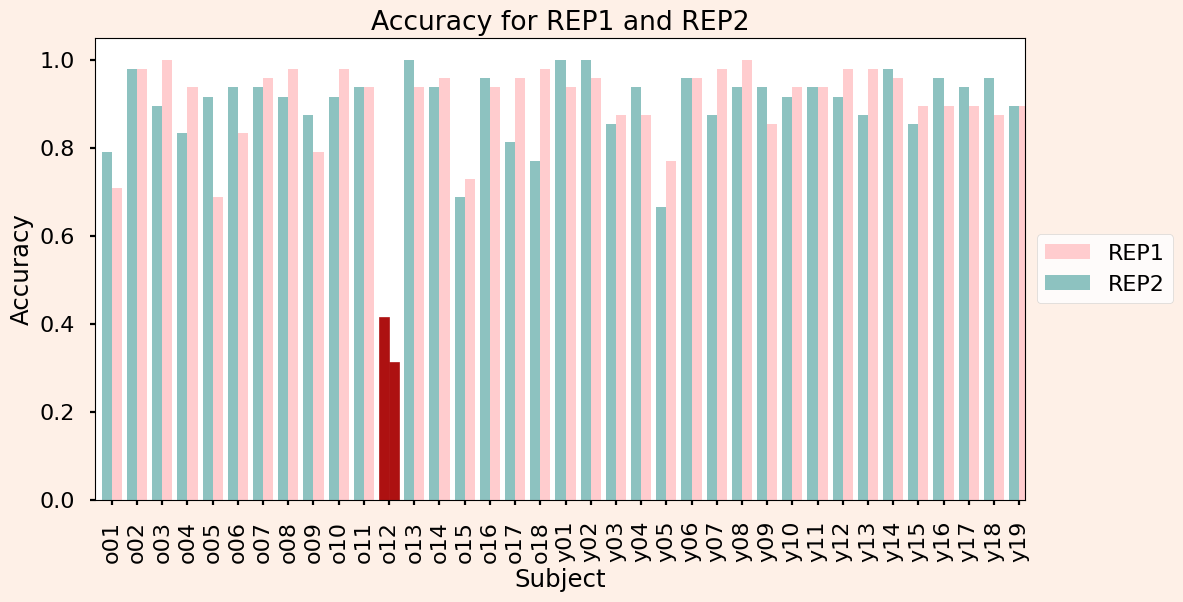

In [68]:
# Plot the accuracies for rep1 and rep2
fig, ax = plt.subplots(figsize=(12, 6))

# Plot rep1 accuracies
reps1[['subject', 'accuracy']].set_index('subject').plot(kind='bar', ax=ax, position=0, width=0.4, color='#ffccce', label='REP1')

# Plot rep2 accuracies
reps2[['subject', 'accuracy']].set_index('subject').plot(kind='bar', ax=ax, position=1, width=0.4, color='#8dc2c0', label='REP2')

# Change the color of a specific subject (o12)
bars = ax.patches
for bar in bars:
    if bar.get_height() < 0.5:
        bar.set_color('#ad1111')

fig.patch.set_facecolor('#fef0e7')
plt.xlabel('Subject')
plt.ylabel('Accuracy')
plt.title('Accuracy for REP1 and REP2')
plt.legend(['REP1', 'REP2'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [69]:
rep_stats_df = rep_stats_df[rep_stats_df['subject'] != 'o12']

reps1 = rep_stats_df[rep_stats_df['rep'] == 'rep1']
reps2 = rep_stats_df[rep_stats_df['rep'] == 'rep2']

In [70]:
# Filter the dataframe for subjects whose first letter is 'y'
y_reps1 = reps1[reps1['subject'].str.startswith('y')]
y_reps2 = reps2[reps2['subject'].str.startswith('y')]
o_reps1 = reps1[reps1['subject'].str.startswith('o')]
o_reps2 = reps2[reps2['subject'].str.startswith('o')]

# Calculate the mean accuracy
mean_accuracy_y_reps1 = y_reps1['accuracy'].mean()
mean_accuracy_y_reps2 = y_reps2['accuracy'].mean()
mean_accuracy_o_reps1 = o_reps1['accuracy'].mean()
mean_accuracy_o_reps2 = o_reps2['accuracy'].mean()

mean_accuracy_y = (mean_accuracy_y_reps1 + mean_accuracy_y_reps2) / 2
mean_accuracy_o = (mean_accuracy_o_reps1 + mean_accuracy_o_reps2) / 2

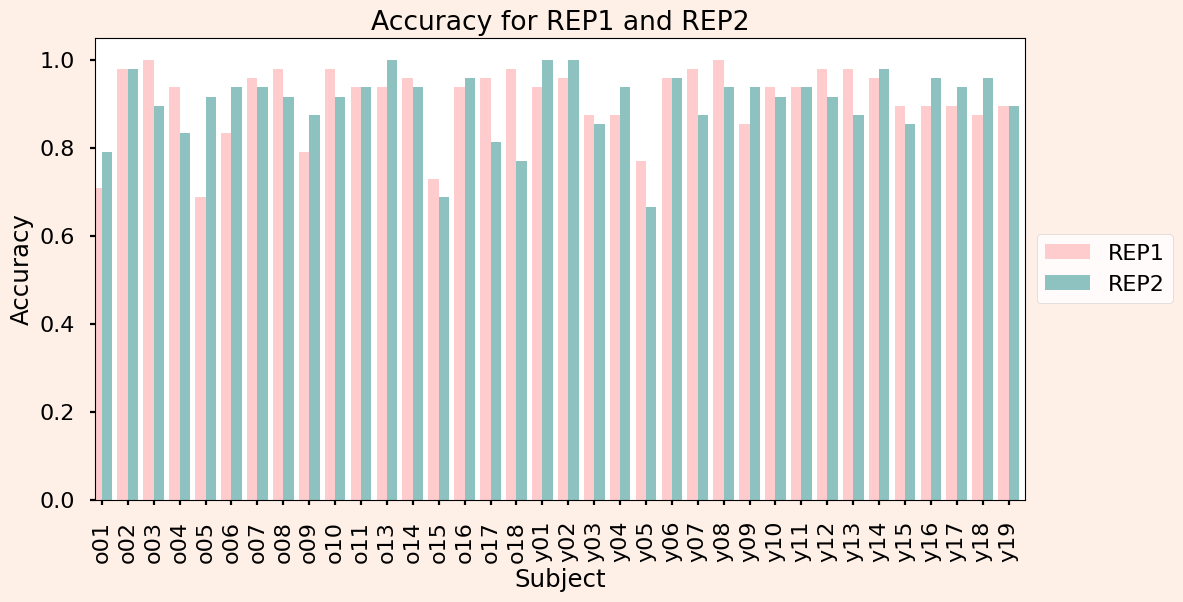

In [71]:
# Plot the accuracies for rep1 and rep2
fig, ax = plt.subplots(figsize=(12, 6))


# Plot rep1 accuracies
reps1[['subject', 'accuracy']].set_index('subject').plot(kind='bar', ax=ax, position=1, width=0.4, color='#ffccce', label='REP1')
# Plot rep2 accuracies
reps2[['subject', 'accuracy']].set_index('subject').plot(kind='bar', ax=ax, position=0, width=0.4, color='#8dc2c0', label='REP2')
# Means
fig.patch.set_facecolor('#fef0e7')
plt.xlabel('Subject')
plt.ylabel('Accuracy')
plt.title('Accuracy for REP1 and REP2')
plt.legend(['REP1', 'REP2'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

$$
\text{Accuracy} = \frac{\text{Correct}}{\text{Total}}
$$

In [72]:
subject_stats_df = rep_stats_df.sort_values(by='rep').groupby('subject').agg({
    'p31': 'sum',
    'p32': 'sum',
    'p33': 'sum',
    'p31_mean_rt': lambda x: x.iloc[1] - x.iloc[0],
    'p32_mean_rt': lambda x: x.iloc[1] - x.iloc[0],
    'p33_mean_rt': lambda x: x.iloc[1] - x.iloc[0],
    'p31_std_rt': lambda x: x.iloc[1] - x.iloc[0],
    'p32_std_rt': lambda x: x.iloc[1] - x.iloc[0],
    'p33_std_rt': lambda x: x.iloc[1] - x.iloc[0],
    'dummy_p3_': 'sum',
    'mean_rt': lambda x: x.iloc[0] - x.iloc[1],
    'std_rt': lambda x: x.iloc[0] - x.iloc[1],
    'mean_acc': lambda x: x.iloc[0] - x.iloc[1],
    'std_acc': lambda x: x.iloc[0] - x.iloc[1]
}).reset_index()

subject_stats_df

,subject,p31,p32,p33,p31_mean_rt,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc
0,o01,17,16,19,44.928571,35.380952,-71.355556,66.857174,10.631648,0.715102,20,NaN,NaN,0,0
1,o02,24,24,24,-83.500000,3.750000,44.666667,12.422876,-24.979282,-2.218431,0,NaN,NaN,0,0
2,o03,23,21,23,-22.128788,129.666667,-14.727273,-77.949252,128.349108,54.174211,5,NaN,NaN,0,0
3,o04,22,21,21,122.583333,-71.590909,-136.583333,189.576505,-227.592514,-323.110670,8,NaN,NaN,0,0
4,o05,17,20,22,-277.028571,127.202020,85.466667,-117.148330,36.862880,99.212789,13,NaN,NaN,0,0
5,o06,23,22,22,-93.666667,-70.233333,-61.181818,0.066228,-115.386423,-91.418164,5,NaN,NaN,0,0
6,o07,23,23,23,43.696970,-10.825758,-103.303030,45.579125,-36.833276,-54.505093,3,NaN,NaN,0,0
7,o08,23,22,23,33.348485,-7.616667,157.939394,247.953389,-106.707190,149.532472,4,NaN,NaN,0,0
8,o09,17,21,22,-73.060606,-127.427273,-26.454545,-83.113914,-430.750151,-11.536060,12,NaN,NaN,0,0
9,o10,22,23,23,53.666667,75.681818,-11.742424,-46.793786,189.711035,-133.400158,4,NaN,NaN,0,0


In [73]:
subject_stats_df['p33_p31_diff'] = subject_stats_df['p33_mean_rt'] - subject_stats_df['p31_mean_rt']
subject_stats_df['p32_p31_diff'] = subject_stats_df['p32_mean_rt'] - subject_stats_df['p31_mean_rt']
subject_stats_df['p33_p32_diff'] = subject_stats_df['p33_mean_rt'] - subject_stats_df['p32_mean_rt']

subject_stats_df

,subject,p31,p32,p33,p31_mean_rt,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc,p33_p31_diff,p32_p31_diff,p33_p32_diff
0,o01,17,16,19,44.928571,35.380952,-71.355556,66.857174,10.631648,0.715102,20,NaN,NaN,0,0,-116.284127,-9.547619,-106.736508
1,o02,24,24,24,-83.500000,3.750000,44.666667,12.422876,-24.979282,-2.218431,0,NaN,NaN,0,0,128.166667,87.250000,40.916667
2,o03,23,21,23,-22.128788,129.666667,-14.727273,-77.949252,128.349108,54.174211,5,NaN,NaN,0,0,7.401515,151.795455,-144.393939
3,o04,22,21,21,122.583333,-71.590909,-136.583333,189.576505,-227.592514,-323.110670,8,NaN,NaN,0,0,-259.166667,-194.174242,-64.992424
4,o05,17,20,22,-277.028571,127.202020,85.466667,-117.148330,36.862880,99.212789,13,NaN,NaN,0,0,362.495238,404.230592,-41.735354
5,o06,23,22,22,-93.666667,-70.233333,-61.181818,0.066228,-115.386423,-91.418164,5,NaN,NaN,0,0,32.484848,23.433333,9.051515
6,o07,23,23,23,43.696970,-10.825758,-103.303030,45.579125,-36.833276,-54.505093,3,NaN,NaN,0,0,-147.000000,-54.522727,-92.477273
7,o08,23,22,23,33.348485,-7.616667,157.939394,247.953389,-106.707190,149.532472,4,NaN,NaN,0,0,124.590909,-40.965152,165.556061
8,o09,17,21,22,-73.060606,-127.427273,-26.454545,-83.113914,-430.750151,-11.536060,12,NaN,NaN,0,0,46.606061,-54.366667,100.972727
9,o10,22,23,23,53.666667,75.681818,-11.742424,-46.793786,189.711035,-133.400158,4,NaN,NaN,0,0,-65.409091,22.015152,-87.424242


In [74]:
youngs = subject_stats_df[subject_stats_df['subject'].str.startswith('y')]
youngs

,subject,p31,p32,p33,p31_mean_rt,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc,p33_p31_diff,p32_p31_diff,p33_p32_diff
17,y01,22,23,24,-55.900000,-39.060606,-75.333333,-45.976646,17.898082,21.991205,3,NaN,NaN,0,0,-19.433333,16.839394,-36.272727
18,y02,23,24,24,-225.893939,-97.583333,-17.083333,-72.645304,-83.787063,-3.710315,1,NaN,NaN,0,0,208.810606,128.310606,80.500000
19,y03,20,21,21,61.000000,78.481818,84.318182,-112.909325,-13.901452,51.034509,10,NaN,NaN,0,0,23.318182,17.481818,5.836364
20,y04,22,24,20,42.050000,-14.500000,-61.000000,72.402030,-23.128125,-0.730046,6,NaN,NaN,0,0,-103.050000,-56.550000,-46.500000
21,y05,15,17,20,46.222222,51.614286,112.600000,-4.734208,-27.128433,58.796115,20,NaN,NaN,0,0,66.377778,5.392063,60.985714
22,y06,23,24,24,-76.280303,-19.166667,16.583333,-15.528061,-15.525795,24.609867,1,NaN,NaN,0,0,92.863636,57.113636,35.750000
23,y07,23,22,23,44.439394,-1.983333,-76.446970,26.953383,65.785302,-46.766060,4,NaN,NaN,0,0,-120.886364,-46.422727,-74.463636
24,y08,24,23,23,4.750000,-5.840909,-30.916667,5.256159,-26.597007,-19.222327,2,NaN,NaN,0,0,-35.666667,-10.590909,-25.075758
25,y09,21,21,21,-136.818182,37.854545,62.572727,-0.986486,-51.122504,136.407018,9,NaN,NaN,0,0,199.390909,174.672727,24.718182
26,y10,22,23,22,48.545455,14.340909,-42.000000,-39.430837,7.109291,-7.682504,5,NaN,NaN,0,0,-90.545455,-34.204545,-56.340909


In [75]:
olds = subject_stats_df[subject_stats_df['subject'].str.startswith('o')]
olds

,subject,p31,p32,p33,p31_mean_rt,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc,p33_p31_diff,p32_p31_diff,p33_p32_diff
0,o01,17,16,19,44.928571,35.380952,-71.355556,66.857174,10.631648,0.715102,20,NaN,NaN,0,0,-116.284127,-9.547619,-106.736508
1,o02,24,24,24,-83.500000,3.750000,44.666667,12.422876,-24.979282,-2.218431,0,NaN,NaN,0,0,128.166667,87.250000,40.916667
2,o03,23,21,23,-22.128788,129.666667,-14.727273,-77.949252,128.349108,54.174211,5,NaN,NaN,0,0,7.401515,151.795455,-144.393939
3,o04,22,21,21,122.583333,-71.590909,-136.583333,189.576505,-227.592514,-323.110670,8,NaN,NaN,0,0,-259.166667,-194.174242,-64.992424
4,o05,17,20,22,-277.028571,127.202020,85.466667,-117.148330,36.862880,99.212789,13,NaN,NaN,0,0,362.495238,404.230592,-41.735354
5,o06,23,22,22,-93.666667,-70.233333,-61.181818,0.066228,-115.386423,-91.418164,5,NaN,NaN,0,0,32.484848,23.433333,9.051515
6,o07,23,23,23,43.696970,-10.825758,-103.303030,45.579125,-36.833276,-54.505093,3,NaN,NaN,0,0,-147.000000,-54.522727,-92.477273
7,o08,23,22,23,33.348485,-7.616667,157.939394,247.953389,-106.707190,149.532472,4,NaN,NaN,0,0,124.590909,-40.965152,165.556061
8,o09,17,21,22,-73.060606,-127.427273,-26.454545,-83.113914,-430.750151,-11.536060,12,NaN,NaN,0,0,46.606061,-54.366667,100.972727
9,o10,22,23,23,53.666667,75.681818,-11.742424,-46.793786,189.711035,-133.400158,4,NaN,NaN,0,0,-65.409091,22.015152,-87.424242


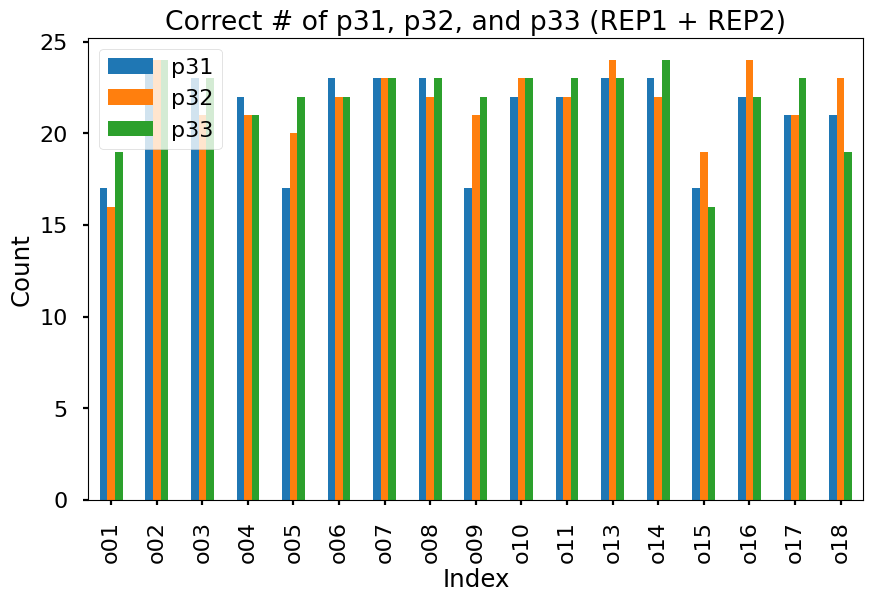

In [76]:
# Plot the counts for p31, p32, and p33
olds.set_index('subject')[['p31', 'p32', 'p33']].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Correct # of p31, p32, and p33 (REP1 + REP2)')
plt.legend(['p31', 'p32', 'p33'])
plt.show()

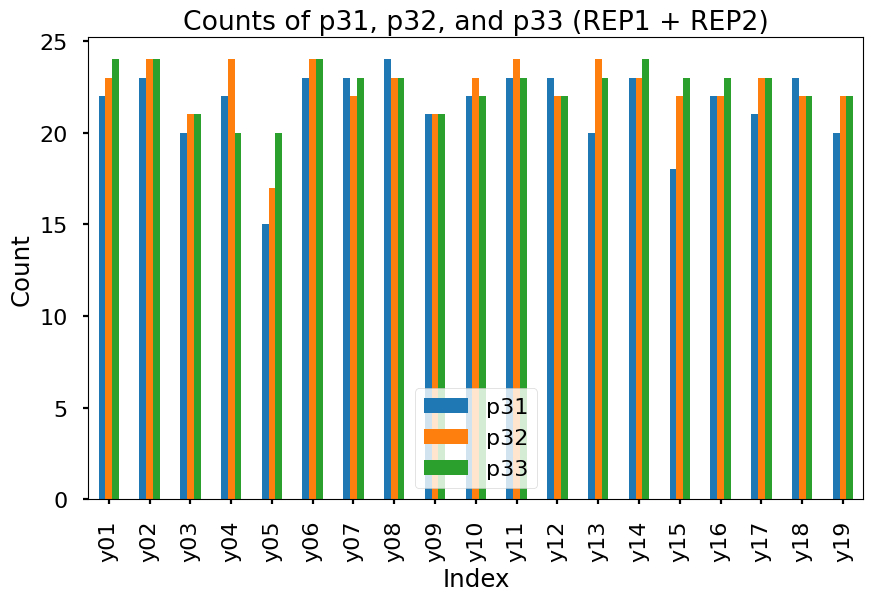

In [77]:
# Plot the counts for p31, p32, and p33
youngs.set_index('subject')[['p31', 'p32', 'p33']].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Counts of p31, p32, and p33 (REP1 + REP2)')
plt.legend(['p31', 'p32', 'p33'])
plt.show()

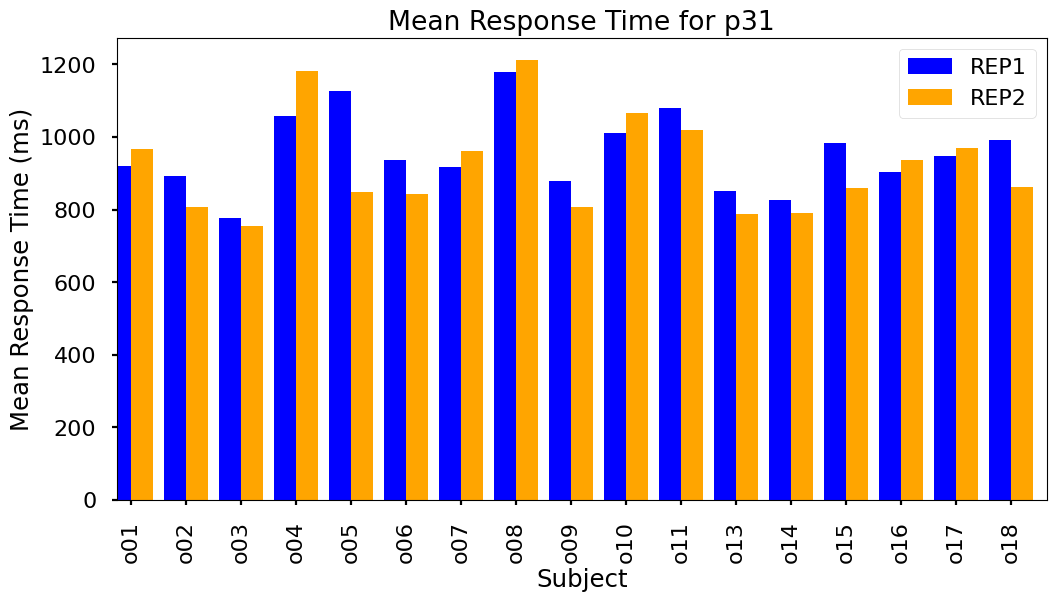

In [78]:
# Plot the mean response time of p31 for o_rep1 and y_rep1
fig, ax = plt.subplots(figsize=(12, 6))

# Plot o_rep1 mean response time for p31
o_reps1[['subject', 'p31_mean_rt']].set_index('subject').plot(kind='bar', ax=ax, position=1, width=0.4, color='blue', label='REP1')

# Plot y_rep1 mean response time for p31
o_reps2[['subject', 'p31_mean_rt']].set_index('subject').plot(kind='bar', ax=ax, position=0, width=0.4, color='orange', label='REP2')

plt.xlabel('Subject')
plt.ylabel('Mean Response Time (ms)')
plt.title('Mean Response Time for p31')
plt.legend(['REP1', 'REP2'])
plt.show()

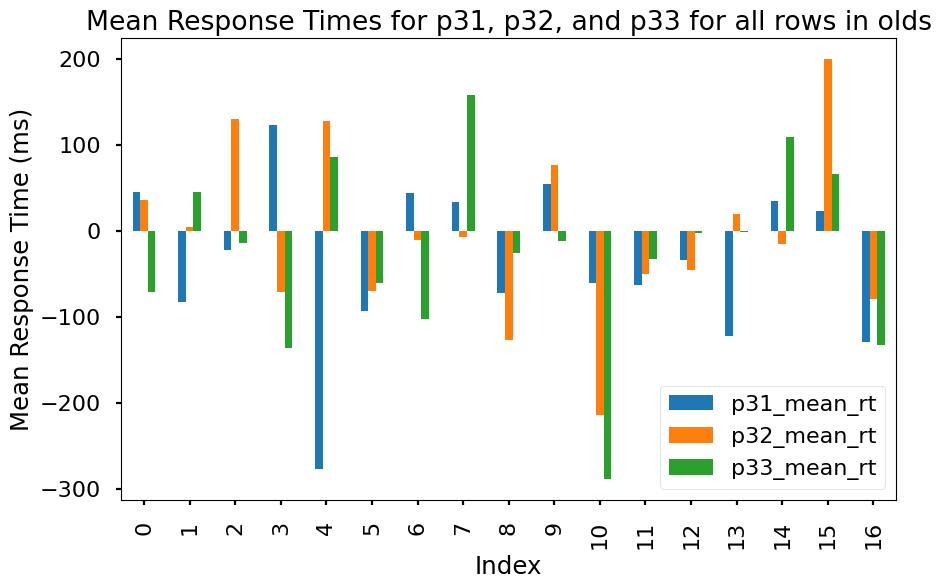

In [79]:
# Plot the mean response times for p31, p32, and p33
olds[['p31_mean_rt', 'p32_mean_rt', 'p33_mean_rt']].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Mean Response Time (ms)')
plt.title('Mean Response Times for p31, p32, and p33 for all rows in olds')
plt.legend(['p31_mean_rt', 'p32_mean_rt', 'p33_mean_rt'])
plt.show()

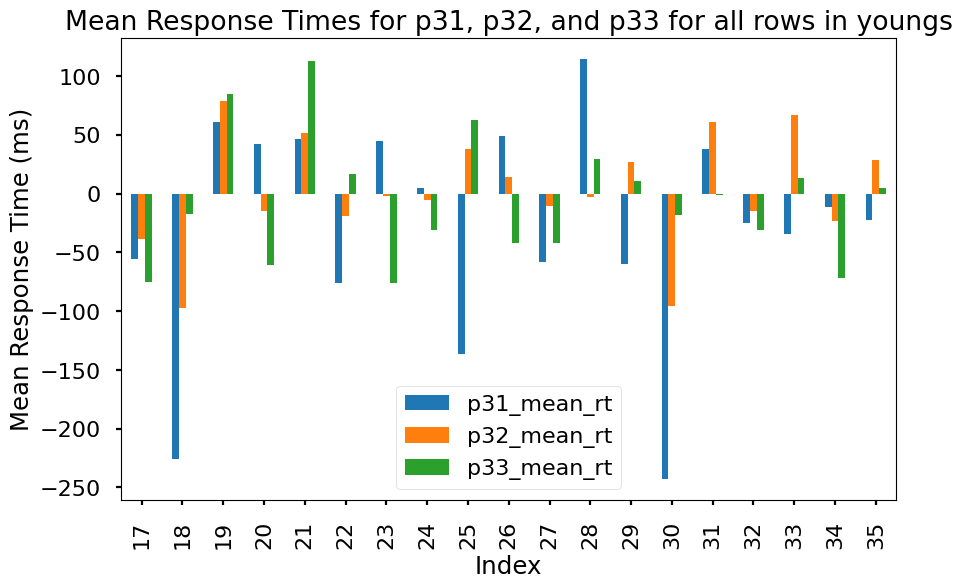

In [80]:
# Plot the mean response times for p31, p32, and p33
youngs[['p31_mean_rt', 'p32_mean_rt', 'p33_mean_rt']].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Mean Response Time (ms)')
plt.title('Mean Response Times for p31, p32, and p33 for all rows in youngs')
plt.legend(['p31_mean_rt', 'p32_mean_rt', 'p33_mean_rt'])
plt.show()

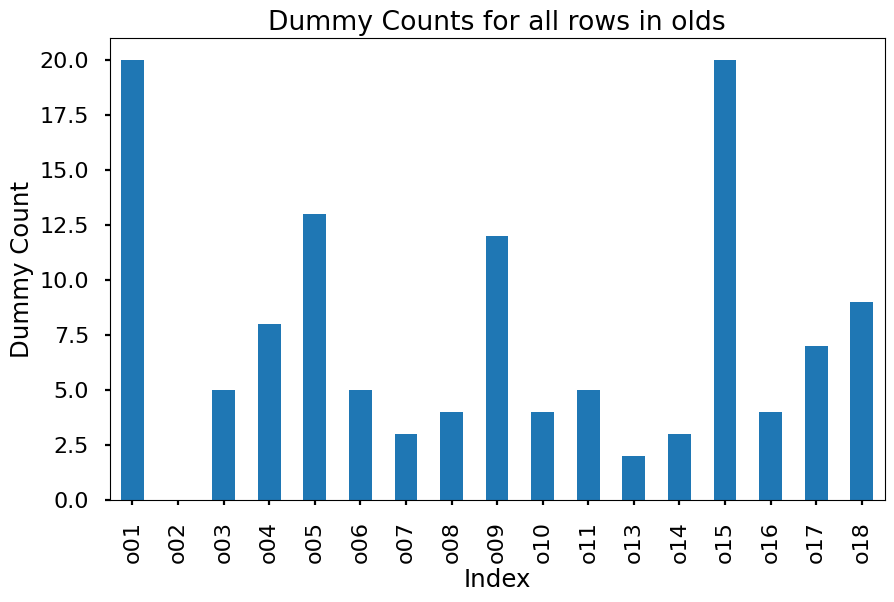

In [81]:
# Plot the dummy counts for olds
olds.set_index('subject')['dummy_p3_'].astype(int).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Dummy Count')
plt.title('Dummy Counts for all rows in olds')
plt.show()

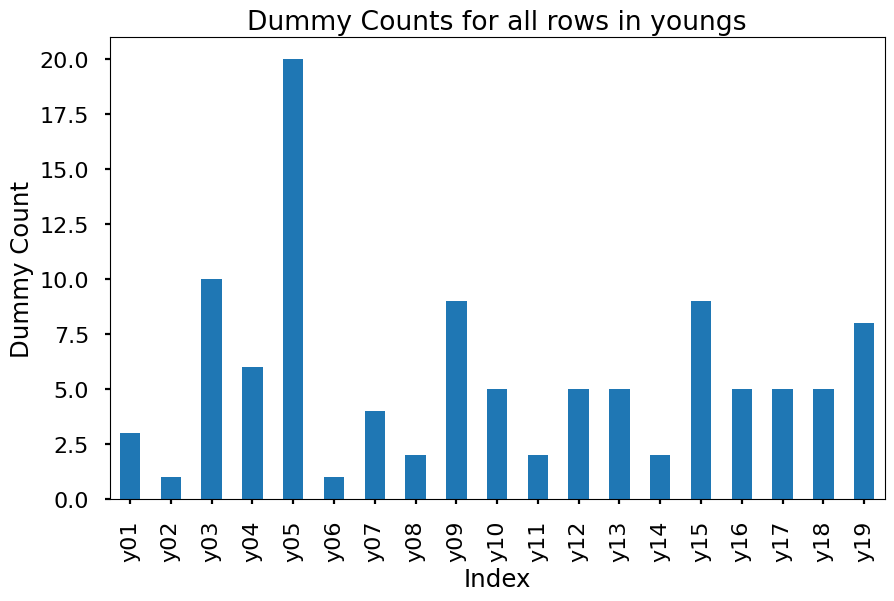

In [82]:
# Plot the dummy counts for olds
youngs.set_index('subject')['dummy_p3_'].astype(int).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Dummy Count')
plt.title('Dummy Counts for all rows in youngs')
plt.show()

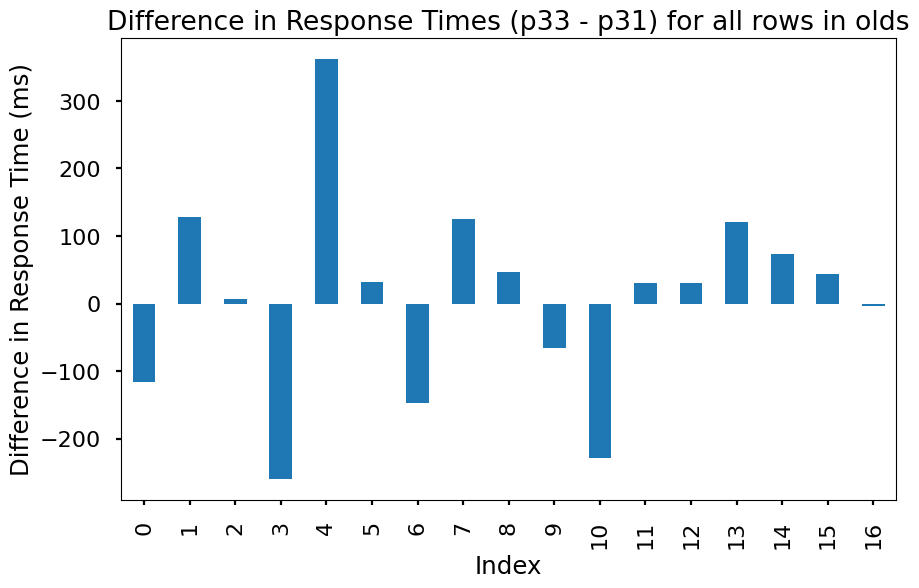

In [83]:
# Plot the p33_p31_diff for olds
olds['p33_p31_diff'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Difference in Response Time (ms)')
plt.title('Difference in Response Times (p33 - p31) for all rows in olds')
plt.show()

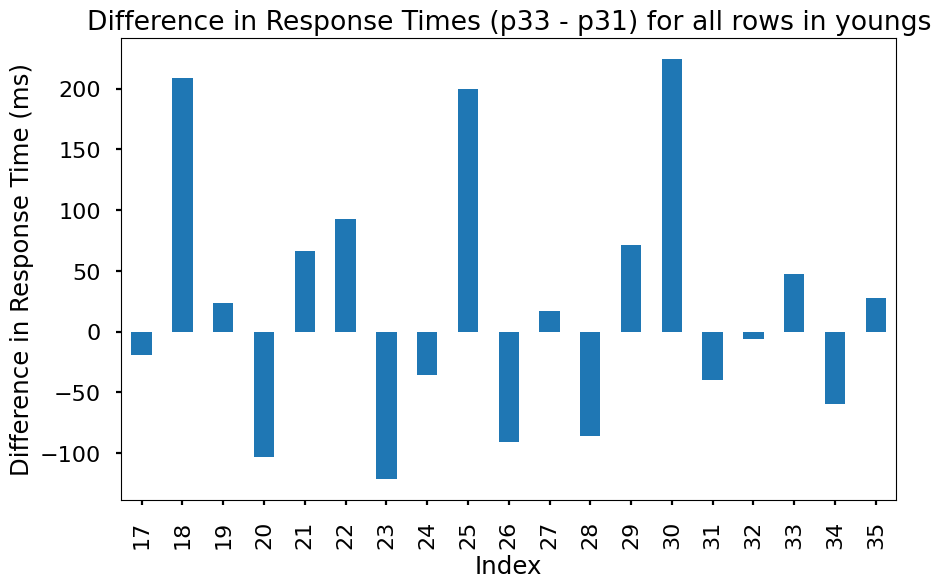

In [84]:
# Plot the p33_p31_diff for olds
youngs['p33_p31_diff'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Difference in Response Time (ms)')
plt.title('Difference in Response Times (p33 - p31) for all rows in youngs')
plt.show()

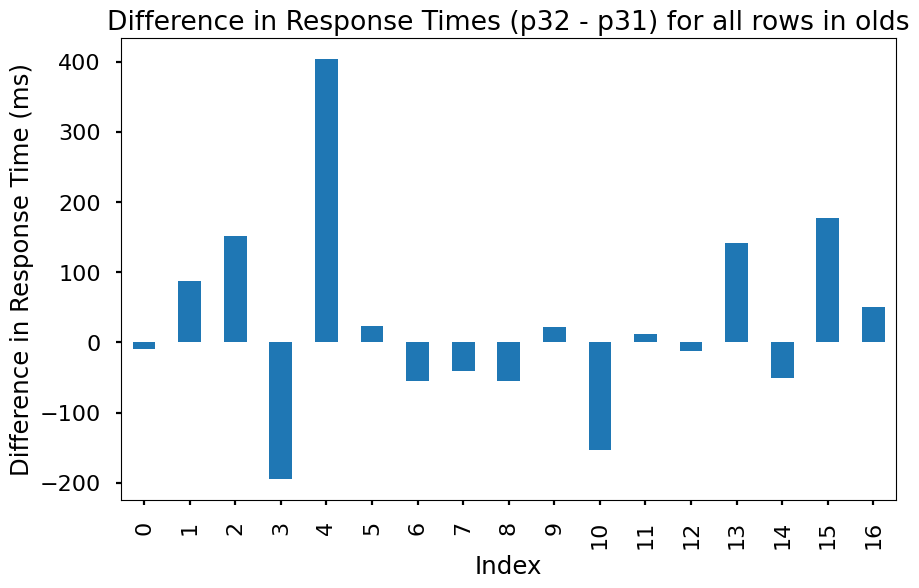

In [85]:
# Plot the p33_p31_diff for olds
olds['p32_p31_diff'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Difference in Response Time (ms)')
plt.title('Difference in Response Times (p32 - p31) for all rows in olds')
plt.show()

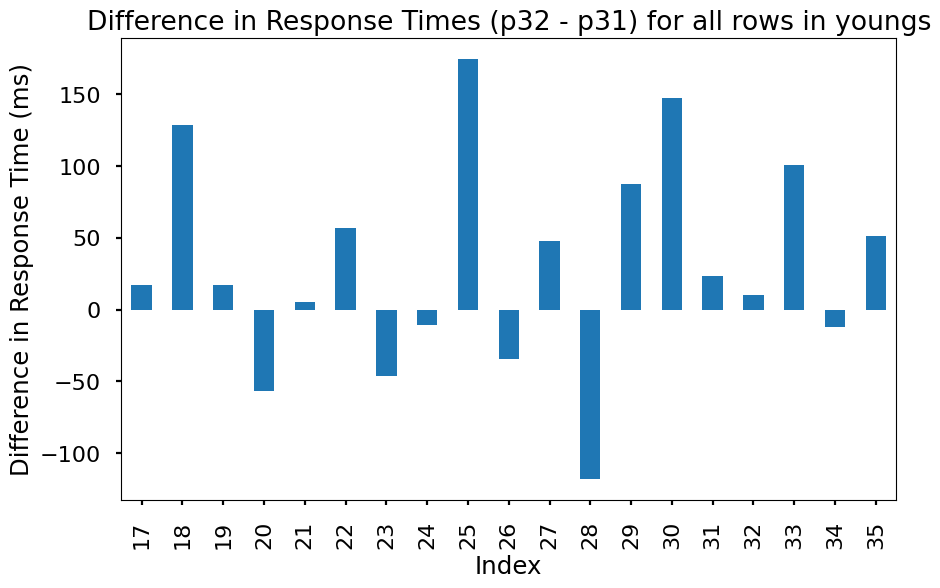

In [86]:
# Plot the p33_p31_diff for olds
youngs['p32_p31_diff'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Difference in Response Time (ms)')
plt.title('Difference in Response Times (p32 - p31) for all rows in youngs')
plt.show()

In [87]:
subject_stats_df

,subject,p31,p32,p33,p31_mean_rt,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc,p33_p31_diff,p32_p31_diff,p33_p32_diff
0,o01,17,16,19,44.928571,35.380952,-71.355556,66.857174,10.631648,0.715102,20,NaN,NaN,0,0,-116.284127,-9.547619,-106.736508
1,o02,24,24,24,-83.500000,3.750000,44.666667,12.422876,-24.979282,-2.218431,0,NaN,NaN,0,0,128.166667,87.250000,40.916667
2,o03,23,21,23,-22.128788,129.666667,-14.727273,-77.949252,128.349108,54.174211,5,NaN,NaN,0,0,7.401515,151.795455,-144.393939
3,o04,22,21,21,122.583333,-71.590909,-136.583333,189.576505,-227.592514,-323.110670,8,NaN,NaN,0,0,-259.166667,-194.174242,-64.992424
4,o05,17,20,22,-277.028571,127.202020,85.466667,-117.148330,36.862880,99.212789,13,NaN,NaN,0,0,362.495238,404.230592,-41.735354
5,o06,23,22,22,-93.666667,-70.233333,-61.181818,0.066228,-115.386423,-91.418164,5,NaN,NaN,0,0,32.484848,23.433333,9.051515
6,o07,23,23,23,43.696970,-10.825758,-103.303030,45.579125,-36.833276,-54.505093,3,NaN,NaN,0,0,-147.000000,-54.522727,-92.477273
7,o08,23,22,23,33.348485,-7.616667,157.939394,247.953389,-106.707190,149.532472,4,NaN,NaN,0,0,124.590909,-40.965152,165.556061
8,o09,17,21,22,-73.060606,-127.427273,-26.454545,-83.113914,-430.750151,-11.536060,12,NaN,NaN,0,0,46.606061,-54.366667,100.972727
9,o10,22,23,23,53.666667,75.681818,-11.742424,-46.793786,189.711035,-133.400158,4,NaN,NaN,0,0,-65.409091,22.015152,-87.424242


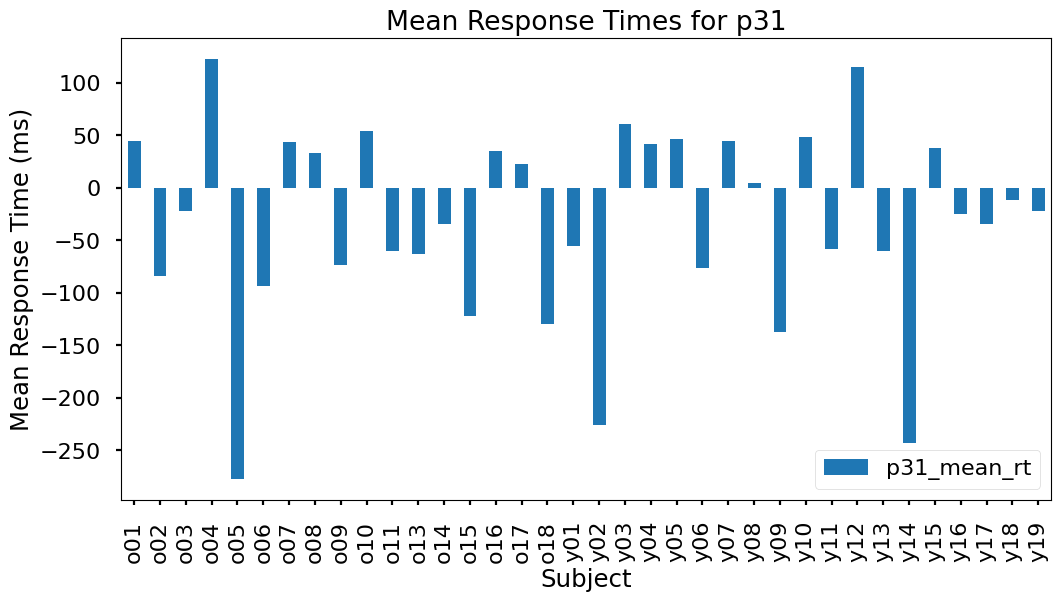

In [88]:
subject_stats_df[['subject', 'p31_mean_rt']].set_index('subject').plot(kind='bar', figsize=(12, 6))
plt.xlabel('Subject')
plt.ylabel('Mean Response Time (ms)')
plt.title('Mean Response Times for p31')
plt.legend(['p31_mean_rt'])
plt.show()

In [89]:
rep_stats_df

,subject,rep,total,unique,correct,incorrect,accuracy,p31,p32,p33,...,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc
0,o01,rep1,48,24,34,1,0.708333,7,7,10,...,803.285714,860.800000,140.580768,153.969385,158.489257,12,NaN,NaN,0,0
1,o01,rep2,48,24,38,5,0.791667,10,9,9,...,838.666667,789.444444,207.437943,164.601033,159.204359,8,965.500000,207.437943,0,0
0,o02,rep1,48,24,47,1,0.979167,12,12,12,...,644.750000,666.666667,137.895876,112.039867,98.721218,0,NaN,NaN,0,0
1,o02,rep2,48,24,47,1,0.979167,12,12,12,...,648.500000,711.333333,150.318752,87.060585,96.502787,0,807.500000,150.318752,0,0
0,o03,rep1,48,24,48,0,1.000000,12,12,12,...,667.000000,722.000000,182.404375,111.949664,107.331263,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,y17,rep2,48,24,45,3,0.937500,10,12,12,...,665.833333,635.916667,133.544999,103.270900,74.456160,2,721.400000,133.544999,0,0
0,y18,rep1,48,24,42,6,0.875000,11,10,11,...,660.600000,738.727273,198.030989,85.381757,168.161286,4,NaN,NaN,0,0
1,y18,rep2,48,24,46,2,0.958333,12,12,11,...,637.166667,667.272727,114.015018,102.322870,132.324670,1,765.833333,114.015018,0,0
0,y19,rep1,48,24,43,5,0.895833,11,11,11,...,664.272727,663.000000,196.760953,90.145539,72.908161,3,NaN,NaN,0,0


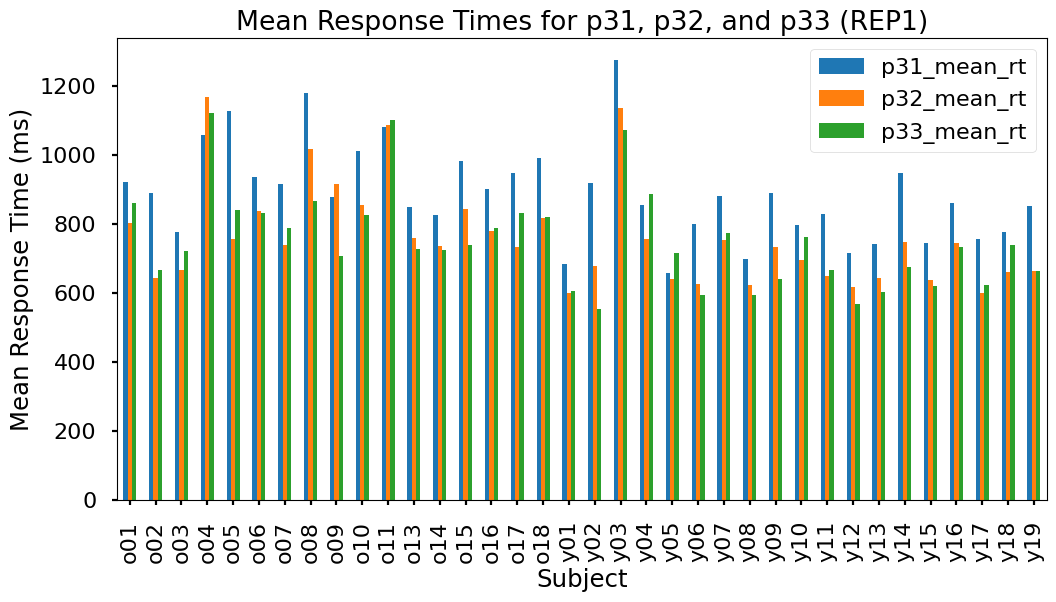

In [90]:
rep1_stats_df = rep_stats_df[rep_stats_df['rep'] == 'rep1']
rep1_stats_df[['subject', 'p31_mean_rt', 'p32_mean_rt', 'p33_mean_rt']].set_index('subject').plot(kind='bar', figsize=(12, 6))
plt.xlabel('Subject')
plt.ylabel('Mean Response Time (ms)')
plt.title('Mean Response Times for p31, p32, and p33 (REP1)')
plt.legend(['p31_mean_rt', 'p32_mean_rt', 'p33_mean_rt'])
plt.show()

In [91]:
rep1_stats_df = rep_stats_df[(rep_stats_df['rep'] == 'rep1') & (rep_stats_df['subject'].str.startswith('o'))]
mean_p31_rt = rep1_stats_df['p31_mean_rt'].mean()
mean_p32_rt = rep1_stats_df['p32_mean_rt'].mean()
mean_p33_rt = rep1_stats_df['p33_mean_rt'].mean()

print(f'Mean response time for p31 in REP1: {mean_p31_rt}')
print(f'Mean response time for p32 in REP1: {mean_p32_rt}')
print(f'Mean response time for p33 in REP1: {mean_p33_rt}')

overall_mean_rt = (mean_p31_rt + mean_p32_rt + mean_p33_rt) / 3
print(f'Overall mean response time for p31, p32, and p33 in REP1: {overall_mean_rt}')
#

Mean response time for p31 in REP1: 957.4102792632204
Mean response time for p32 in REP1: 833.0140735081911
Mean response time for p33 in REP1: 821.3836898395722
Overall mean response time for p31, p32, and p33 in REP1: 870.6026808703278


In [92]:
rep1_stats_df = rep_stats_df[(rep_stats_df['rep'] == 'rep1') & (rep_stats_df['subject'].str.startswith('y'))]
y_mean_p31_rt = rep1_stats_df['p31_mean_rt'].mean()
y_mean_p32_rt = rep1_stats_df['p32_mean_rt'].mean()
y_mean_p33_rt = rep1_stats_df['p33_mean_rt'].mean()

print(f'Mean response time for p31 in REP1: {y_mean_p31_rt}')
print(f'Mean response time for p32 in REP1: {y_mean_p32_rt}')
print(f'Mean response time for p33 in REP1: {y_mean_p33_rt}')

y_overall_mean_rt = (y_mean_p31_rt + y_mean_p32_rt + y_mean_p33_rt) / 3
print(f'Overall mean response time for p31, p32, and p33 in REP1: {y_overall_mean_rt}')
#

Mean response time for p31 in REP1: 825.2732323232324
Mean response time for p32 in REP1: 695.086283891547
Mean response time for p33 in REP1: 688.9728867623603
Overall mean response time for p31, p32, and p33 in REP1: 736.4441343257132


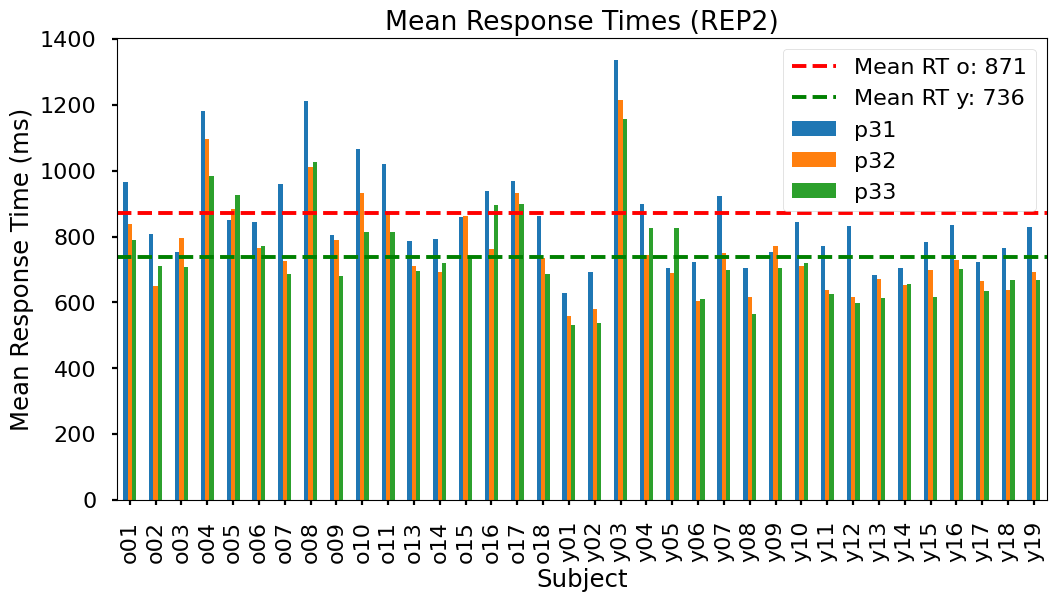

In [93]:
rep1_stats_df = rep_stats_df[rep_stats_df['rep'] == 'rep2']
rep1_stats_df[['subject', 'p31_mean_rt', 'p32_mean_rt', 'p33_mean_rt']].set_index('subject').plot(kind='bar', figsize=(12, 6))
plt.axhline(y=overall_mean_rt, color='r', linestyle='--', label=f'Overall Mean RT old: {overall_mean_rt:.2f}')
plt.axhline(y=y_overall_mean_rt, color='g', linestyle='--', label=f'Overall Mean RT young: {y_overall_mean_rt:.2f}')
plt.xlabel('Subject')
plt.ylabel('Mean Response Time (ms)')
plt.title('Mean Response Times (REP2)')
plt.legend([f'Mean RT o: {overall_mean_rt:.0f}', f'Mean RT y: {y_overall_mean_rt:.0f}', 'p31', 'p32', 'p33'])
plt.show()

In [94]:
youngs

,subject,p31,p32,p33,p31_mean_rt,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc,p33_p31_diff,p32_p31_diff,p33_p32_diff
17,y01,22,23,24,-55.900000,-39.060606,-75.333333,-45.976646,17.898082,21.991205,3,NaN,NaN,0,0,-19.433333,16.839394,-36.272727
18,y02,23,24,24,-225.893939,-97.583333,-17.083333,-72.645304,-83.787063,-3.710315,1,NaN,NaN,0,0,208.810606,128.310606,80.500000
19,y03,20,21,21,61.000000,78.481818,84.318182,-112.909325,-13.901452,51.034509,10,NaN,NaN,0,0,23.318182,17.481818,5.836364
20,y04,22,24,20,42.050000,-14.500000,-61.000000,72.402030,-23.128125,-0.730046,6,NaN,NaN,0,0,-103.050000,-56.550000,-46.500000
21,y05,15,17,20,46.222222,51.614286,112.600000,-4.734208,-27.128433,58.796115,20,NaN,NaN,0,0,66.377778,5.392063,60.985714
22,y06,23,24,24,-76.280303,-19.166667,16.583333,-15.528061,-15.525795,24.609867,1,NaN,NaN,0,0,92.863636,57.113636,35.750000
23,y07,23,22,23,44.439394,-1.983333,-76.446970,26.953383,65.785302,-46.766060,4,NaN,NaN,0,0,-120.886364,-46.422727,-74.463636
24,y08,24,23,23,4.750000,-5.840909,-30.916667,5.256159,-26.597007,-19.222327,2,NaN,NaN,0,0,-35.666667,-10.590909,-25.075758
25,y09,21,21,21,-136.818182,37.854545,62.572727,-0.986486,-51.122504,136.407018,9,NaN,NaN,0,0,199.390909,174.672727,24.718182
26,y10,22,23,22,48.545455,14.340909,-42.000000,-39.430837,7.109291,-7.682504,5,NaN,NaN,0,0,-90.545455,-34.204545,-56.340909


In [95]:
rep_stats_df

,subject,rep,total,unique,correct,incorrect,accuracy,p31,p32,p33,...,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc
0,o01,rep1,48,24,34,1,0.708333,7,7,10,...,803.285714,860.800000,140.580768,153.969385,158.489257,12,NaN,NaN,0,0
1,o01,rep2,48,24,38,5,0.791667,10,9,9,...,838.666667,789.444444,207.437943,164.601033,159.204359,8,965.500000,207.437943,0,0
0,o02,rep1,48,24,47,1,0.979167,12,12,12,...,644.750000,666.666667,137.895876,112.039867,98.721218,0,NaN,NaN,0,0
1,o02,rep2,48,24,47,1,0.979167,12,12,12,...,648.500000,711.333333,150.318752,87.060585,96.502787,0,807.500000,150.318752,0,0
0,o03,rep1,48,24,48,0,1.000000,12,12,12,...,667.000000,722.000000,182.404375,111.949664,107.331263,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,y17,rep2,48,24,45,3,0.937500,10,12,12,...,665.833333,635.916667,133.544999,103.270900,74.456160,2,721.400000,133.544999,0,0
0,y18,rep1,48,24,42,6,0.875000,11,10,11,...,660.600000,738.727273,198.030989,85.381757,168.161286,4,NaN,NaN,0,0
1,y18,rep2,48,24,46,2,0.958333,12,12,11,...,637.166667,667.272727,114.015018,102.322870,132.324670,1,765.833333,114.015018,0,0
0,y19,rep1,48,24,43,5,0.895833,11,11,11,...,664.272727,663.000000,196.760953,90.145539,72.908161,3,NaN,NaN,0,0


In [96]:
o_reps1

,subject,rep,total,unique,correct,incorrect,accuracy,p31,p32,p33,...,p32_mean_rt,p33_mean_rt,p31_std_rt,p32_std_rt,p33_std_rt,dummy_p3_,mean_rt,std_rt,mean_acc,std_acc
0,o01,rep1,48,24,34,1,0.708333,7,7,10,...,803.285714,860.800000,140.580768,153.969385,158.489257,12,NaN,NaN,0,0
0,o02,rep1,48,24,47,1,0.979167,12,12,12,...,644.750000,666.666667,137.895876,112.039867,98.721218,0,NaN,NaN,0,0
0,o03,rep1,48,24,48,0,1.000000,12,12,12,...,667.000000,722.000000,182.404375,111.949664,107.331263,0,NaN,NaN,0,0
0,o04,rep1,48,24,45,3,0.937500,12,11,12,...,1169.090909,1120.916667,176.036906,442.212721,446.473955,1,NaN,NaN,0,0
0,o05,rep1,48,24,33,1,0.687500,7,9,10,...,755.888889,841.200000,267.795231,171.889823,142.081197,10,NaN,NaN,0,0
0,o06,rep1,48,24,40,3,0.833333,11,10,11,...,836.900000,832.727273,100.903915,202.412368,179.417441,4,NaN,NaN,0,0
0,o07,rep1,48,24,46,2,0.958333,11,12,12,...,737.916667,788.666667,179.852313,102.281660,115.464543,1,NaN,NaN,0,0
0,o08,rep1,48,24,47,1,0.979167,12,12,11,...,1018.416667,867.727273,458.506634,408.424792,375.006691,1,NaN,NaN,0,0
0,o09,rep1,48,24,38,2,0.791667,6,10,11,...,915.700000,706.090909,315.977003,551.317221,141.673889,9,NaN,NaN,0,0
0,o10,rep1,48,24,47,1,0.979167,12,12,12,...,855.500000,826.833333,275.913963,493.341206,331.366546,0,NaN,NaN,0,0


In [97]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [98]:
# Apply a theme
plt.style.use('seaborn-v0_8-poster')

Mean accuracy for REP1: 0.90
Mean accuracy for REP2: 0.89


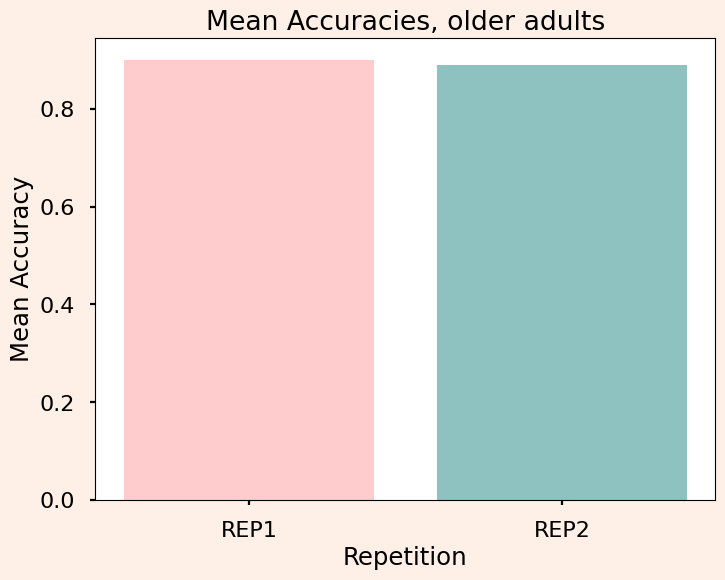

In [99]:
# Calculate the mean accuracies
mean_accuracy_o_reps1 = o_reps1['accuracy'].mean()
mean_accuracy_o_reps2 = o_reps2['accuracy'].mean()
print(f'Mean accuracy for REP1: {mean_accuracy_o_reps1:.2f}')
print(f'Mean accuracy for REP2: {mean_accuracy_o_reps2:.2f}')

# Plot the mean accuracies
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(['REP1', 'REP2'], [mean_accuracy_o_reps1, mean_accuracy_o_reps2], color=['#ffccce', '#8dc2c0'])
fig.patch.set_facecolor('#fef0e7')
ax.set_xlabel('Repetition')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Mean Accuracies, older adults')


plt.show()

Mean accuracy for REP1: 0.92
Mean accuracy for REP2: 0.92


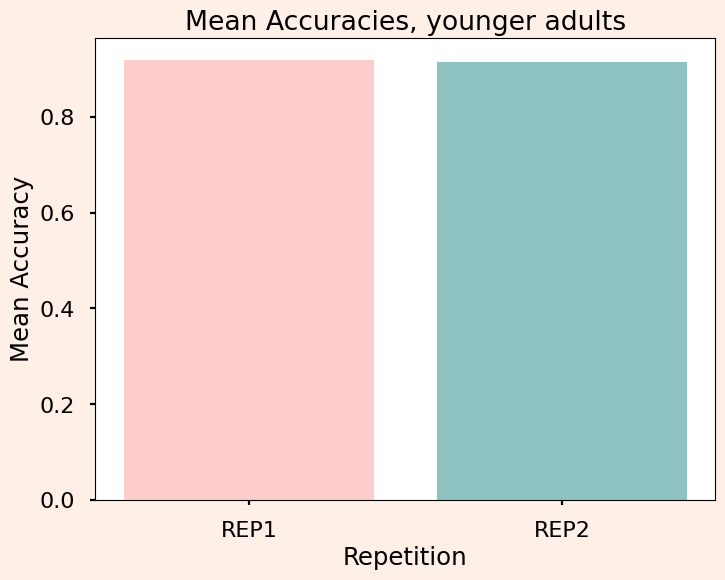

In [100]:
# Calculate the mean accuracies
mean_accuracy_y_reps1 = y_reps1['accuracy'].mean()
mean_accuracy_y_reps2 = y_reps2['accuracy'].mean()

print(f'Mean accuracy for REP1: {mean_accuracy_y_reps1:.2f}')
print(f'Mean accuracy for REP2: {mean_accuracy_y_reps2:.2f}')


# Plot the mean accuracies
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(['REP1', 'REP2'], [mean_accuracy_y_reps1, mean_accuracy_y_reps2], color=['#ffccce', '#8dc2c0'])
fig.patch.set_facecolor('#fef0e7')
ax.set_xlabel('Repetition')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Mean Accuracies, younger adults')

plt.show()

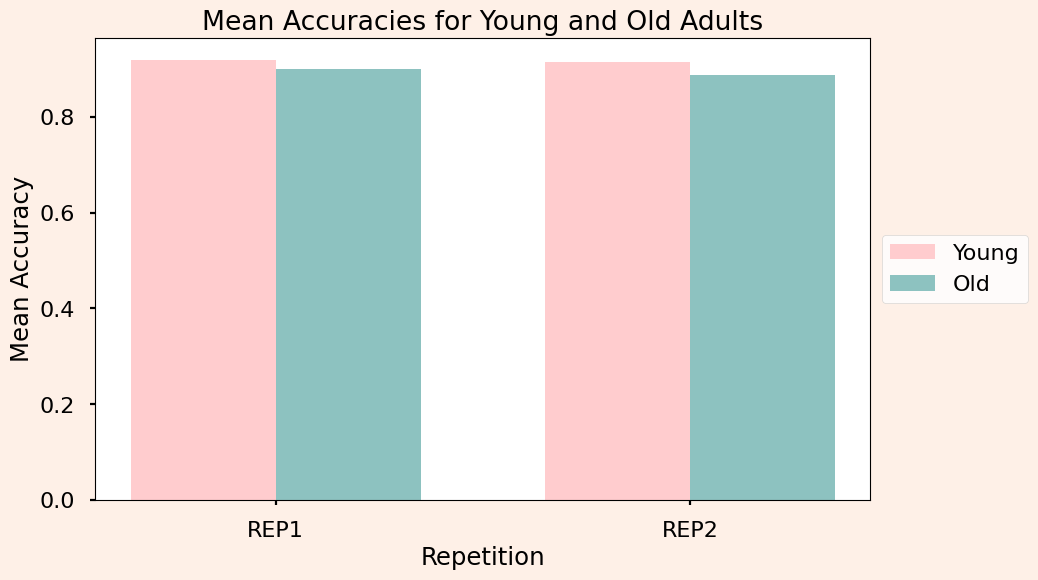

In [101]:
# Calculate the mean accuracies for young and old adults
mean_accuracy_y_reps1 = y_reps1['accuracy'].mean()
mean_accuracy_y_reps2 = y_reps2['accuracy'].mean()
mean_accuracy_o_reps1 = o_reps1['accuracy'].mean()
mean_accuracy_o_reps2 = o_reps2['accuracy'].mean()
import numpy as np
# Plot the mean accuracies
fig, ax = plt.subplots(figsize=(10, 6))

# Define the positions for the bars
bar_width = 0.35
r1 = np.arange(2)
r2 = [x + bar_width for x in r1]

# Plot the mean accuracies for young adults
ax.bar(r1, [mean_accuracy_y_reps1, mean_accuracy_y_reps2], width=bar_width, label='Young', color='#ffccce')

# Plot the mean accuracies for old adults
ax.bar(r2, [mean_accuracy_o_reps1, mean_accuracy_o_reps2], width=bar_width, label='Old', color='#8dc2c0')

# Add labels and title
ax.set_xlabel('Repetition')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Mean Accuracies for Young and Old Adults')
fig.patch.set_facecolor('#fef0e7')
ax.set_xticks([r + bar_width / 2 for r in range(2)])
ax.set_xticklabels(['REP1', 'REP2'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Show the plot
plt.show()

In [102]:
print(o_reps1.columns)
o_reps1[['subject', 'rep', 'p31', 'p31_mean_rt', 'p32', 'p32_mean_rt', 'p33', 'p33_mean_rt']]

Index(['subject', 'rep', 'total', 'unique', 'correct', 'incorrect', 'accuracy',
       'p31', 'p32', 'p33', 'p31_mean_rt', 'p32_mean_rt', 'p33_mean_rt',
       'p31_std_rt', 'p32_std_rt', 'p33_std_rt', 'dummy_p3_', 'mean_rt',
       'std_rt', 'mean_acc', 'std_acc'],
      dtype='object')


,subject,rep,p31,p31_mean_rt,p32,p32_mean_rt,p33,p33_mean_rt
0,o01,rep1,7,920.571429,7,803.285714,10,860.800000
0,o02,rep1,12,891.000000,12,644.750000,12,666.666667
0,o03,rep1,12,775.583333,12,667.000000,12,722.000000
0,o04,rep1,12,1058.916667,11,1169.090909,12,1120.916667
0,o05,rep1,7,1126.428571,9,755.888889,10,841.200000
0,o06,rep1,11,937.000000,10,836.900000,11,832.727273
0,o07,rep1,11,916.636364,12,737.916667,12,788.666667
0,o08,rep1,12,1178.833333,12,1018.416667,11,867.727273
0,o09,rep1,6,879.333333,10,915.700000,11,706.090909
0,o10,rep1,12,1011.833333,12,855.500000,12,826.833333


In [103]:
o_reps1['global_mean_rt'] = (o_reps1['p31_mean_rt'] + o_reps1['p32_mean_rt'] + o_reps1['p33_mean_rt']) / 3
o_reps2['global_mean_rt'] = (o_reps2['p31_mean_rt'] + o_reps2['p32_mean_rt'] + o_reps2['p33_mean_rt']) / 3

/tmp/ipykernel_3500/720466725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_reps1['global_mean_rt'] = (o_reps1['p31_mean_rt'] + o_reps1['p32_mean_rt'] + o_reps1['p33_mean_rt']) / 3
/tmp/ipykernel_3500/720466725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_reps2['global_mean_rt'] = (o_reps2['p31_mean_rt'] + o_reps2['p32_mean_rt'] + o_reps2['p33_mean_rt']) / 3


In [104]:
y_reps1['global_mean_rt'] = (y_reps1['p31_mean_rt'] + y_reps1['p32_mean_rt'] + y_reps1['p33_mean_rt']) / 3
y_reps2['global_mean_rt'] = (y_reps2['p31_mean_rt'] + y_reps2['p32_mean_rt'] + y_reps2['p33_mean_rt']) / 3

/tmp/ipykernel_3500/967169284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_reps1['global_mean_rt'] = (y_reps1['p31_mean_rt'] + y_reps1['p32_mean_rt'] + y_reps1['p33_mean_rt']) / 3
/tmp/ipykernel_3500/967169284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_reps2['global_mean_rt'] = (y_reps2['p31_mean_rt'] + y_reps2['p32_mean_rt'] + y_reps2['p33_mean_rt']) / 3


Mean accuracy for REP1: 870.60
Mean accuracy for REP2: 848.46


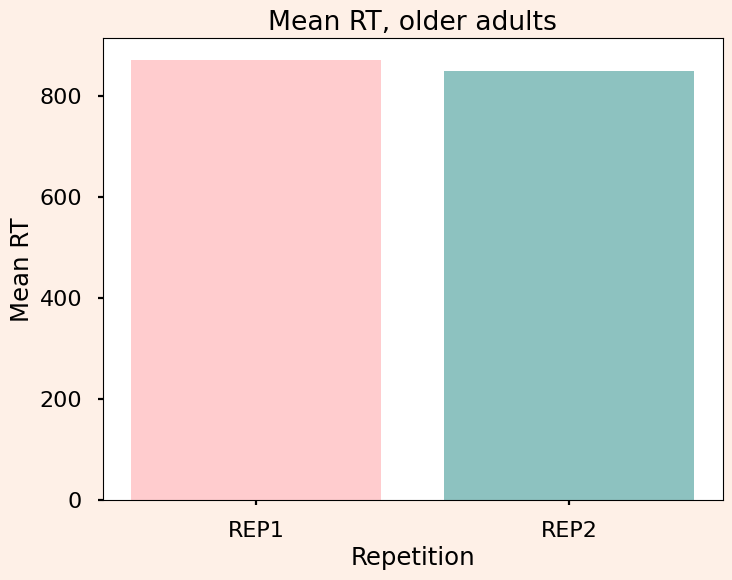

In [105]:
# Calculate the mean accuracies
mean_global_rt_o_reps1 = o_reps1['global_mean_rt'].mean()
mean_global_rt_o_reps2 = o_reps2['global_mean_rt'].mean()

print(f'Mean accuracy for REP1: {mean_global_rt_o_reps1:.2f}')
print(f'Mean accuracy for REP2: {mean_global_rt_o_reps2:.2f}')


# Plot the mean accuracies
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(['REP1', 'REP2'], [mean_global_rt_o_reps1, mean_global_rt_o_reps2], color=['#ffccce', '#8dc2c0'])
fig.patch.set_facecolor('#fef0e7')
ax.set_xlabel('Repetition')
ax.set_ylabel('Mean RT')
ax.set_title('Mean RT, older adults')
plt.show()

Mean accuracy for REP1: 736.44
Mean accuracy for REP2: 725.17


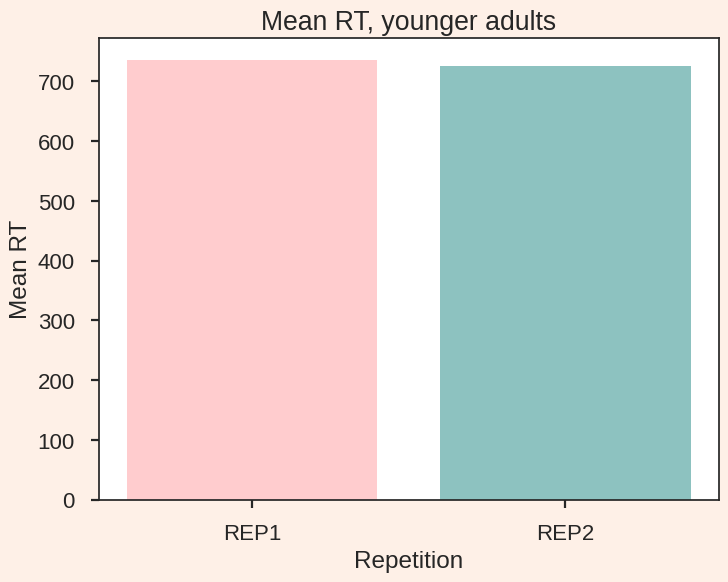

In [ ]:
# Calculate the mean accuracies
mean_global_rt_y_reps1 = y_reps1['global_mean_rt'].mean()
mean_global_rt_y_reps2 = y_reps2['global_mean_rt'].mean()

print(f'Mean accuracy for REP1: {mean_global_rt_y_reps1:.2f}')
print(f'Mean accuracy for REP2: {mean_global_rt_y_reps2:.2f}')


# Plot the mean accuracies
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(['REP1', 'REP2'], [mean_global_rt_y_reps1, mean_global_rt_y_reps2], color=['#ffccce', '#8dc2c0'])
fig.patch.set_facecolor('#fef0e7')
ax.set_xlabel('Repetition')
ax.set_ylabel('Mean RT')
ax.set_title('Mean RT, younger adults')
plt.show()

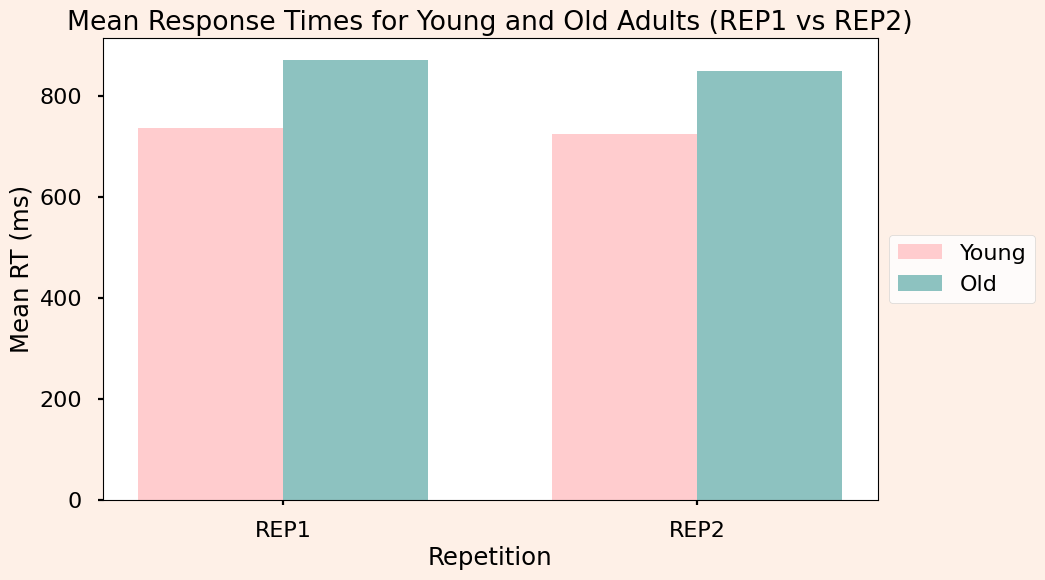

In [109]:
# Calculate the mean global RT for young and old adults for rep1 and rep2
mean_global_rt_y_reps1 = y_reps1['global_mean_rt'].mean()
mean_global_rt_y_reps2 = y_reps2['global_mean_rt'].mean()
mean_global_rt_o_reps1 = o_reps1['global_mean_rt'].mean()
mean_global_rt_o_reps2 = o_reps2['global_mean_rt'].mean()

# Plot the mean global RTs
fig, ax = plt.subplots(figsize=(10, 6))

# Define the positions for the bars
bar_width = 0.35
r1 = np.arange(2)
r2 = [x + bar_width for x in r1]

# Plot the mean global RTs for young adults
ax.bar(r1, [mean_global_rt_y_reps1, mean_global_rt_y_reps2], width=bar_width, label='Young', color='#ffccce')

# Plot the mean global RTs for old adults
ax.bar(r2, [mean_global_rt_o_reps1, mean_global_rt_o_reps2], width=bar_width, label='Old', color='#8dc2c0')

# Add labels and title
ax.set_xlabel('Repetition')
ax.set_ylabel('Mean RT (ms)')
ax.set_title('Mean Response Times for Young and Old Adults (REP1 vs REP2)')
ax.set_xticks([r + bar_width / 2 for r in range(2)])
ax.set_xticklabels(['REP1', 'REP2'])
ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.patch.set_facecolor('#fef0e7')


# Show the plot
plt.show()

10.736842105263158
11.31578947368421
11.421052631578947
10.736842105263158
11.105263157894736
11.052631578947368


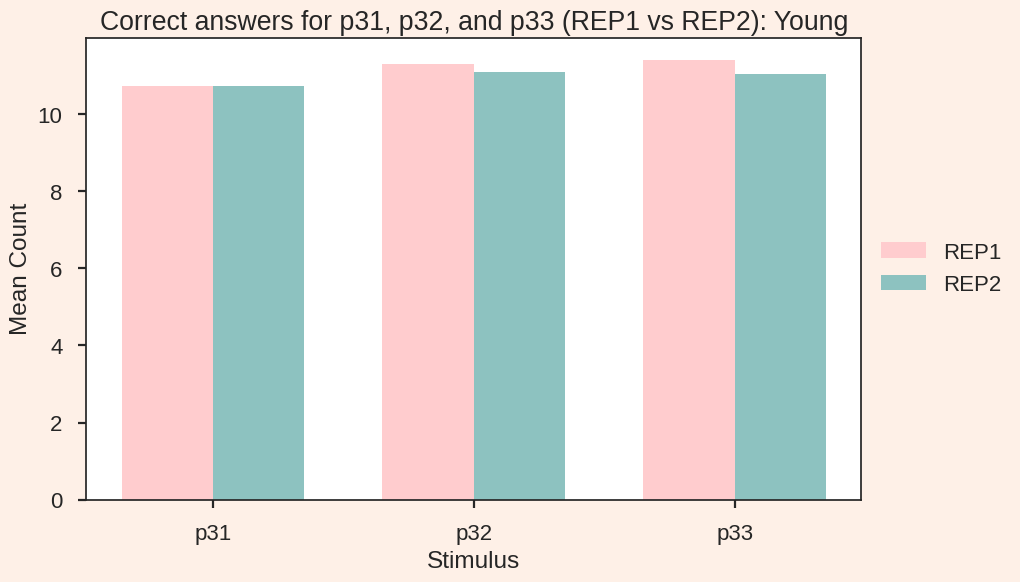

In [ ]:
import numpy as np

print(y_reps1['p31'].mean())
print(y_reps1['p32'].mean())
print(y_reps1['p33'].mean())

print(y_reps2['p31'].mean())
print(y_reps2['p32'].mean())
print(y_reps2['p33'].mean())

# Calculate the mean counts for p31, p32, and p33 for y_reps1 and y_reps2
mean_counts_rep1 = [y_reps1['p31'].mean(), y_reps1['p32'].mean(), y_reps1['p33'].mean()]
mean_counts_rep2 = [y_reps2['p31'].mean(), y_reps2['p32'].mean(), y_reps2['p33'].mean()]

# Define the positions for the bars
bar_width = 0.35
r1 = np.arange(len(mean_counts_rep1))
r2 = [x + bar_width for x in r1]

# Plot the mean counts for p31, p32, and p33 for y_reps1 and y_reps2
fig, ax = plt.subplots(figsize=(10, 6))

# Plot y_reps1 mean counts
ax.bar(r1, mean_counts_rep1, width=bar_width, label='REP1', color='#ffccce')

# Plot y_reps2 mean counts
ax.bar(r2, mean_counts_rep2, width=bar_width, label='REP2', color='#8dc2c0')

# Add labels and title
ax.set_xlabel('Stimulus')
ax.set_ylabel('Mean Count')
ax.set_title('Correct answers for p31, p32, and p33 (REP1 vs REP2): Young')
ax.set_xticks([r + bar_width / 2 for r in range(len(mean_counts_rep1))])
ax.set_xticklabels(['p31', 'p32', 'p33'])
ax.legend()
fig.patch.set_facecolor('#fef0e7')
plt.legend(['REP1', 'REP2'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

10.529411764705882
10.941176470588236
11.294117647058824
10.647058823529411
10.705882352941176
10.588235294117647


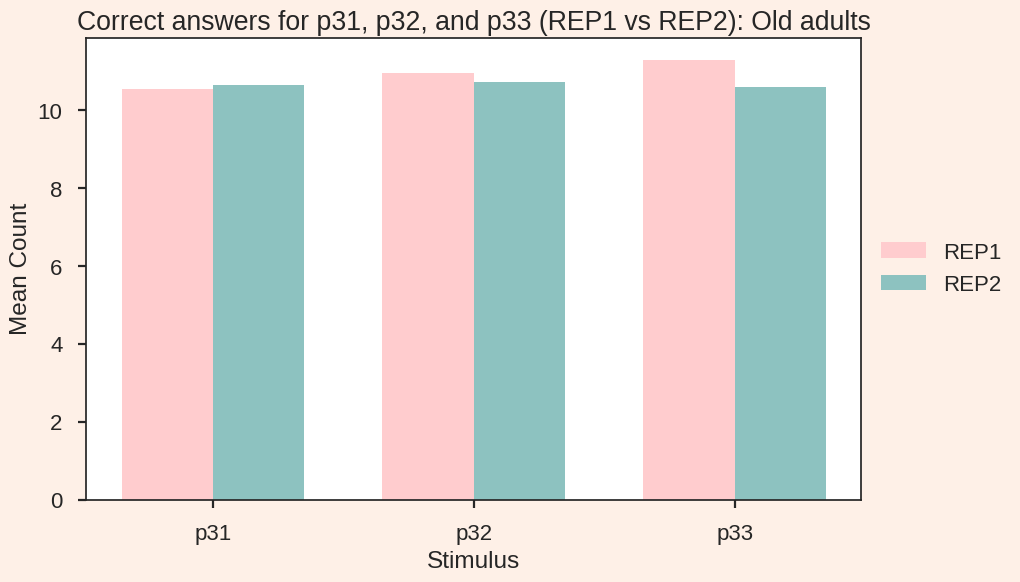

In [ ]:
import numpy as np

print(o_reps1['p31'].mean())
print(o_reps1['p32'].mean())
print(o_reps1['p33'].mean())

print(o_reps2['p31'].mean())
print(o_reps2['p32'].mean())
print(o_reps2['p33'].mean())

# Calculate the mean counts for p31, p32, and p33 for y_reps1 and y_reps2
mean_counts_rep1 = [o_reps1['p31'].mean(), o_reps1['p32'].mean(), o_reps1['p33'].mean()]
mean_counts_rep2 = [o_reps2['p31'].mean(), o_reps2['p32'].mean(), o_reps2['p33'].mean()]

# Define the positions for the bars
bar_width = 0.35
r1 = np.arange(len(mean_counts_rep1))
r2 = [x + bar_width for x in r1]

# Plot the mean counts for p31, p32, and p33 for y_reps1 and y_reps2
fig, ax = plt.subplots(figsize=(10, 6))

# Plot y_reps1 mean counts
ax.bar(r1, mean_counts_rep1, width=bar_width, label='REP1', color='#ffccce')

# Plot y_reps2 mean counts
ax.bar(r2, mean_counts_rep2, width=bar_width, label='REP2', color='#8dc2c0')

# Add labels and title
ax.set_xlabel('Stimulus')
ax.set_ylabel('Mean Count')
ax.set_title('Correct answers for p31, p32, and p33 (REP1 vs REP2): Old adults')
ax.set_xticks([r + bar_width / 2 for r in range(len(mean_counts_rep1))])
ax.set_xticklabels(['p31', 'p32', 'p33'])
ax.legend()
fig.patch.set_facecolor('#fef0e7')
plt.legend(['REP1', 'REP2'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

# Example data
data = {
    'subject': np.repeat(np.arange(1, 11), 2),  # 10 subjects, 2 repetitions each
    'age': np.tile(np.repeat(['young', 'old'], 5), 2),  # 5 young, 5 old
    'repetition': np.tile(['rep1', 'rep2'], 10),  # 2 repetitions
    'accuracy': np.random.rand(20)  # Random accuracy scores
}

df = pd.DataFrame(data)

df

,subject,age,repetition,accuracy
0,1,young,rep1,0.867751
1,1,young,rep2,0.767134
2,2,young,rep1,0.625775
3,2,young,rep2,0.045650
4,3,young,rep1,0.140654
5,3,old,rep2,0.694924
6,4,old,rep1,0.195047
7,4,old,rep2,0.337381
8,5,old,rep1,0.105901
9,5,old,rep2,0.140340


In [ ]:
# Fit the repeated measures ANOVA model
aovrm = AnovaRM(df, 'accuracy', 'subject', within=['repetition'], between=['age'])
res = aovrm.fit()

# Print the results
print(res)


NotImplementedError: Between subject effect not yet supported!

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

model = mixedlm('accuracy ~ repetition * age', df, groups=df['subject'])
result = model.fit()
print(result.summary())

                  Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       accuracy
No. Observations:         20            Method:                   REML    
No. Groups:               10            Scale:                    0.0383  
Min. group size:          2             Log-Likelihood:           -4.8814 
Max. group size:          2             Converged:                Yes     
Mean group size:          2.0                                             
--------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                        0.351    0.142  2.477 0.013  0.073  0.629
repetition[T.rep2]               0.161    0.133  1.211 0.226 -0.099  0.421
age[T.young]                     0.137    0.179  0.763 0.445 -0.214  0.488
repetition[T.rep2]:age[T.young] -0.310    0.